<a href="https://colab.research.google.com/github/mervebudakk/python/blob/main/05_HSV%2CHSI_ve_YUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. HSV RENK UZAYI
 RGB renk uzayı genel olarak kullanılan renk uzayıdır. Bu renk uzayında üç ana bileşen kullanılır.Görüntü **r, g, b** yani **kırmızı, yeşil, mavi** renk kodları üzerine tanımlanır. Her piksel bu renk kodlarına göre ara değerler alır. Böylece renkli bir resim elde edilir.

HSV renk uzayı ise **Hue(Renk), Saturation(Doygunluk) ve Value(Parlaklık)**  terimleri ile rengi tanımlar.RGB de renklerin karışımı kullanılmasına karşın HSV de renk, doygunluk ve parlaklık değerleri kullanılır. Doygunluk rengin canlılığını belirlerken parlaklık rengin aydınlığını ifade eder. Örneğin; HSV uzayında siyah renk için renk ve doygunluk değerleri 0 ile 255 arasında herhangi bir değer alabilirken  parlaklık değeri sıfırdır. Beyaz renkte ise parlaklık değeri 255’tir. Buna göre herhangi bir bilgisayarlı görme/görüntü işleme uygulamasında belirli renkteki bir nesneyi ayırt etmek istenirse HSV renk uzayını kullanmak daha elverişlidir. Çünkü RGB renk uzayında eşik değeri için kullanılan filtreler yerine burada sadece Hue bileşeni ile eşik değeri belirlenebilir. Böylelikle daha net renkler elde edilebilir.
 HSV renk uzayı 1978 yılında Alvy Ray Smith tarafından RGB uzayına göre insan görme sistemine daha benzer bir yapı oluşturmak amacıyla tanımlandı.

 Şekil 1’de görüleceği üzere H değeri 0-360° arasında değişirken renklerin öz değerleri değişir. Ancak H sabit olarak seçilir ve diğer değerler (S-V) 0-100 arasında değiştirilirse aynı rengin farklı doygunluk ve parlaklıktaki değerleri elde edilir. Bu özelliğinden dolayı HSV renk temelli ayırma işlemlerinde sıklıkla tercih edilir. İki uzay arasındaki dönüşüm doğrusal olmayan bir bağlantı ile gerçekleştirilir.

In [ ]:
#Google Drive'ınızı bağlamak için kullanılır.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image
from IPython.display import display

#PIL modülünden Image kütüphanesi uygulamaya dahil edilir.

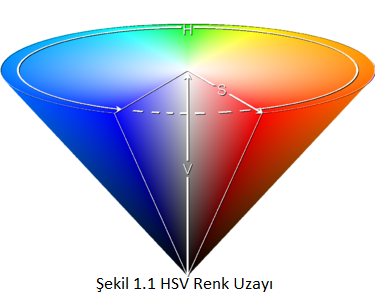

In [ ]:
from IPython.display import Image
Image(filename="/content/05_HSV_cone.png")

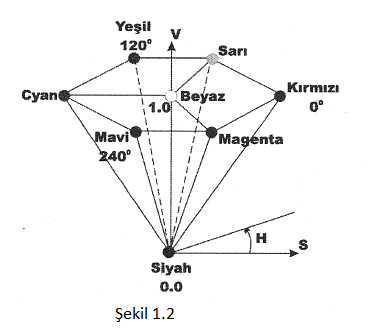

In [ ]:
Image(filename="/content/05_HSV2.PNG")

##1.1. HSV Modelleme
RGB renk uzayından HSV renk uzayına geçiş yapmak için belirli formüller kullanılır. Burada dikkat edilmesi gereken nokta RGB değerlerini 0-1 arasına indirilmesi gerekliliğidir. Her pikselin değeri 255 ile bölünerek normalize edildikten sonra aşağıdaki formüller ile HSV değerleri bulunabilir.

İlk olarak görüntünün piksel değerlerinde bulunan renk kodları alınır .

R' = R/255

G' = G/255

B' = B/255

Cmax = max (R', G', B')

Cmin = min (R', G', B')

Δ = Cmax - Cmin




Hue(Renk) değeri için hesaplama:

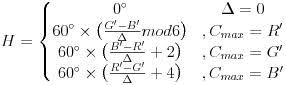

In [ ]:
Image(filename="/content/05_hsvFormul1.jpg")

Saturation(Doygunluk) değeri için hesaplama:


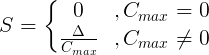

In [ ]:
Image(filename="/content/05_HSVformul2.png")

Value(Parlaklık) değeri için hesaplama:

>$V = Cmax$

##1.2.HSV  Metodu Uygulaması:



In [ ]:
def  rgbtohsv (r, g, b):
#Kullanılan fonksiyon 'rgbtohsv' adında int türünde 'r,g,b' adlı üç parametre ile kullanmaktadır.
    r, g, b = r/255.0, g/255.0, b/255.0
#Alınan r,g,b değişkenlerini normalize hale getirmek için yani 0-1 değerleri arasına almak için her değişken 255 sayısına bölünür.
    Cmax = max (r, g, b)
#Yeni değerleri hesaplanan r,g,b değişkenleri arasından en büyük olanı bulunup 'Cmax' değişkenine atılır.
    Cmin = min (r, g, b)
#Yeni değerleri hesaplanan r,g,b değişkenleri arasından en küçük olanı bulunup 'Cmin' değişkenine atılır.
    delta = Cmax - Cmin
#Formülde belirtilen delta değişkeninin hesaplanması için en büyük değerden en küçük değer çıkarılır. Böylece orta bir değer hesaplanır.
    if delta == 0:
#Hue bileşenini bulmak; yani 'h' değişkeni için, eğer en küçük ve en büyük değer eşit ise hue(renk) bileşenine '0' değeri atanır.
        h = 0
    elif Cmax == r:
#Eğer bulunan en büyük değer r(kırmızı) değişkenine eşitse formüldeki denklem uygulanır. En son 360 ile mod işlemi yapılmasının nedeni raporda belirtildiği gibi Hue bileşeni derece cinsinden değer almaktadır. Bu yüzden 360 üzerinden mod alınarak derecesi hesaplanır.
        h = (60 * ((g-b)/delta)) % 360
    elif Cmax == g:
#Eğer bulunan en büyük değer g(yeşil) değişkenine eşitse formüldeki denklem uygulanır. Burada +2 kullanılmasının nedeni 360 derecelik Hue bileşeninde yeşil renginin başlangıç açısı 120 derecesine denk gelmektedir.(Şekil 1.2 de gösterilmiştir.)
        h = (60 * ((b-r)/delta) + 2) % 360
    elif Cmax == b:
#Eğer bulunan en büyük değer b(mavi) değişkenine eşitse formüldeki denklem uygulanır. Burada +4 kullanılmasının nedeni 360 derecelik Hue bileşeninde mavi renginin başlangıç açısı 240 derecesine denk gelmektedir.(Şekil 1.2 de gösterilmiştir.)
        h = (60 * ((r-g)/delta) + 4) % 360
    if Cmax == 0:
#Saturation bileşenini bulmak; yani 's' değişkeni için, eğer 'Cmax' en büyük değişkenimiz '0' ise s değişkenine 0 değeri atılır..
        s = 0
    else:
        s = delta/Cmax
#Değilse formülde gösterildiği gibi, bulunan delta değişkeni en büyük değere bölünür.
    v = Cmax
#Value bileşenini en büyük değer oluşturmaktadır.
    h=int(h)
#Son olarak görüntüdeki piksel değerleri int türünde olduğundan tüm değişkenlere tür dönüşümü yapılır.
    s=int(s)
    v=int(v)
    return h, s, v
    #Tür dönüşümü yapılan değerler geri gönderilir.


In [ ]:
from PIL import Image

resim = Image.open("/content/05_HSV.jpg")

resim_pix = resim.load()

#resmi load fonksiyonuyla pix değişkenine yüklüyoruz

In [ ]:
#@title HSV.jpg dosyanın orjinal hali
display(resim)

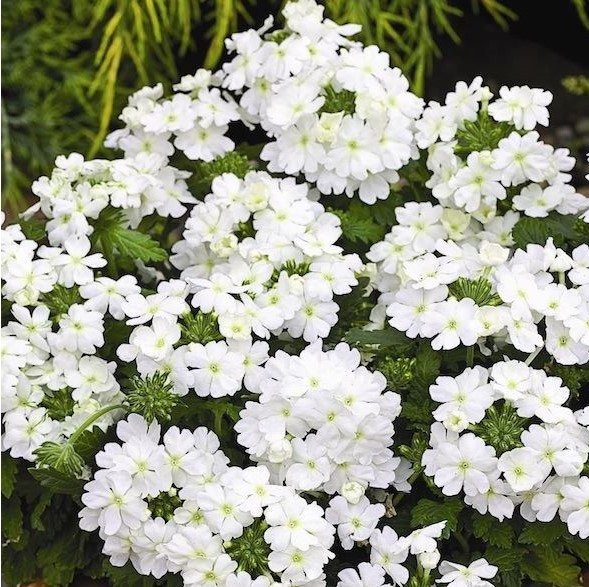

In [ ]:
w=resim.size[0]
#w değişkenine resim dosyasının genişlik boyutunu atılır. Dosyanın genişliği 640 piksel.
hg=resim.size[1]
#hg değişkenine resim dosyasının yükseklik boyutunu atılır. Dosyanın yüksekliği 360 piksel.
for i in range(w):
#Görüntünün tüm piksellerinde bulunan renk kodlarını almak için iç içe döngü oluşturulur.
    for j in range(hg):
        r, g, b = resim.getpixel((i, j))
 #Her pikselde birer r(kırmızı),g(yeşil),b(mavi) değeri bulunmaktadır. Bunlar o piksele renk veren kodlardır. Öncelikle 'getpixel' fonksiyonu ile bu değerleri r,g,b değişkenlerine atılır.
        h, s, v = rgbtohsv(r, g, b)
#Alınan r,g,b değişkenler rgbtohsv fonksiyonuna gönderilir. Bu fonksiyonun geri dönüşü üç parametre olacaktır. Bunlar da h,s,v değişkenlerinde saklanır.
        resim_pix[i,j] = (h, s, v)
#Fonksiyondan elde edilen  h,s,v değerleri görüntünün uygun piksellerine yeni değer olarak atılır.
resim.save("/content/hsv_new.jpg")


In [ ]:
#@title hsv.jpg  dosyasının yeni hali
display(resim)

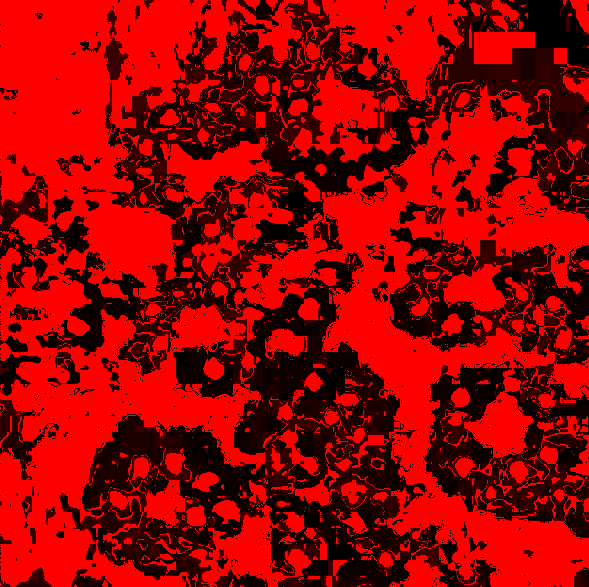

##2.HSI RENK UZAYI


RGB, CMY gibi renk uzayları insan gözünün renk alma yapısındadır. İnsan beyninde renkler tanınırken ya da birbiri ile karşılaştırılırken bu modellerin kullanımı zordur.
Bu nedenle bu tür çalışmalarda **renk özü (hue-H), doygunluk (saturation-S) ve şiddet (intensity-I)** tanımlamaları kullanılır. Bu bileşenlerden oluşan modele de HSI (hue, saturation, intensity) renk modeli adı verilir.
Sonuçta söyleyebiliriz ki, RGB renk modeli renk oluşturma için idealdir (örn;
monitör) fakat betimlemede kötüdür. HSI renk modeli ise renge bağlı tanımlamada çok iyidir.


In [ ]:
from IPython.display import Image
Image(filename="/content/05_HSV_cylinder.png")

##2.1. HSI Modelleme

**Renk Özü (Hue-H) :** Baskın renk dalga boyunu gösterir ve açısal olarak [0°,360°] aralığında ifade edilir.

**Doygunluk (Saturation-S) :** Saf rengin beyaz ışık
ile hangi oranda karıştığını gösterir. Yarıçapa
karşılık gelir ve [0,1] aralığında değer alır.

**Şiddet (Intensity-I):** Işık miktarını gösterir.


**RGB → HSI geçiş:**

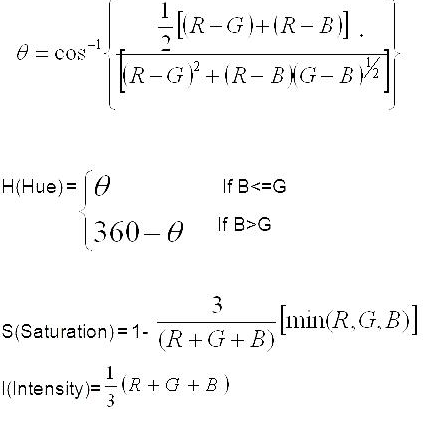

In [ ]:
Image(filename="/content/05_hsiFormul.png")

##2.2. HSI  Metodu Uygulaması

In [ ]:
from PIL import Image
import math

#PIL modülünden IMAGE kütüphanesi uygulamaya dahil edilir.
def  rgbtohsi (R, G, B):
#Kullanılan fonksiyon 'rgbtohsi' adında int türünde 'r,g,b' adlı üç parametre ile kullanmaktadır.

  r = R / 255
  g = G / 255  #Değerler normalize hale getirilir.
  b = B / 255

  num=0.5*((r-g)+(r-b))
  den=((r-g)*(r-g)+(r-b)*(g-b))**(0.5) #Formül uygulanır.

  if(b<=g):
     # h [0,pi] aralığında
     if den != 0:
         h = math.acos(num / (den))
     else:
         h = 0

  elif(b>g):
      # h [pi,2pi] aralığında
      if den!=0:
          h=(2*math.pi)-math.acos(num/den)
      else:
          h=0
  s=1-(3*min(r,g,b)/(r+g+b)) #s değeri
  i=(r+g+b)/3                #i değeri

  return int(h*180/math.pi), int(s*100), int(i*255)
  #Tür dönüşümü yapılan değerler geri gönderilir.


In [ ]:
from PIL import Image

resim = Image.open("/content/05_hsi.png").convert('RGB')

resim_pix = resim.load()

#resmi load fonksiyonuyla pix değişkenine yüklüyoruz


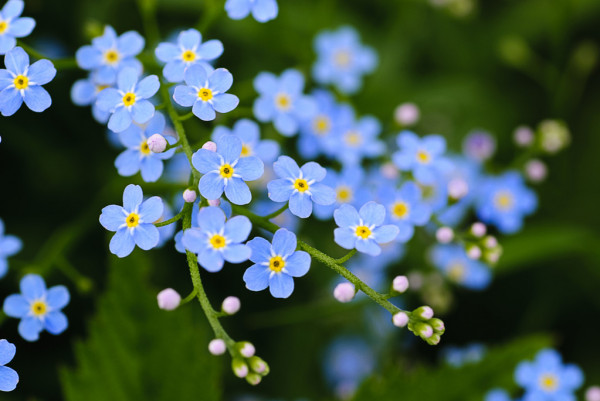

In [ ]:
#@title hsi.png dosyanın orjinal hali
display(resim)

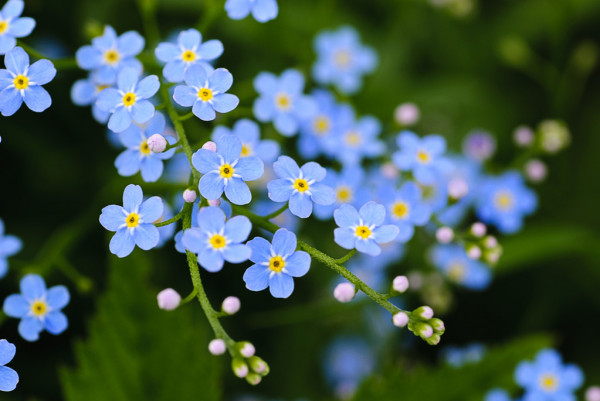

In [ ]:
w=resim.size[0]
#w değişkenine resim dosyasının genişlik boyutunu atılır. Dosyanın genişliği 640 piksel.
hg=resim.size[1]
#hg değişkenine resim dosyasının yükseklik boyutunu atılır. Dosyanın yüksekliği 360 piksel.
for i in range(w):
#Görüntünün tüm piksellerinde bulunan renk kodlarını almak için iç içe döngü oluşturulur.
  for j in range(hg):
      r, g, b = resim.getpixel((i, j))
#Her pikselde birer r(kırmızı),g(yeşil),b(mavi) değeri bulunmaktadır. Bunlar o piksele renk veren kodlardır. Öncelikle 'getpixel' fonksiyonu ile bu değerleri r,g,b değişkenlerine atılır.
      h, s, v = rgbtohsi(r, g, b)
#Alınan r,g,b değişkenler rgbtohsi fonksiyonuna gönderilir. Bu fonksiyonun geri dönüşü üç parametre olacaktır. Bunlar da h,s,v değişkenlerinde saklanır.
      resim_pix[i,j] = (h, s, v)
#Fonksiyondan elde edilen  h,s,i değerleri görüntünün uygun piksellerine yeni değer olarak atılır.
resim.save("/content/hsi_new.jpg")


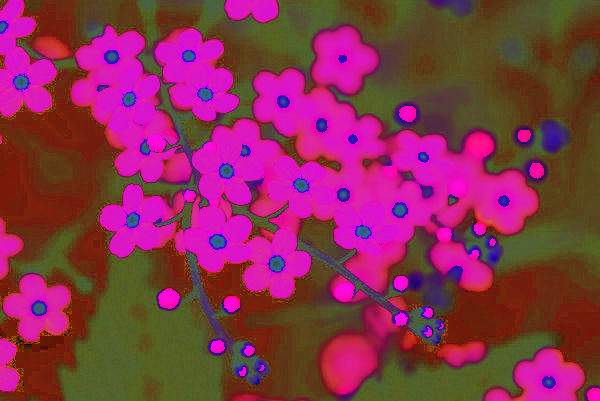

In [ ]:
#@title hsi.png dosyasının yeni hali
display(resim)

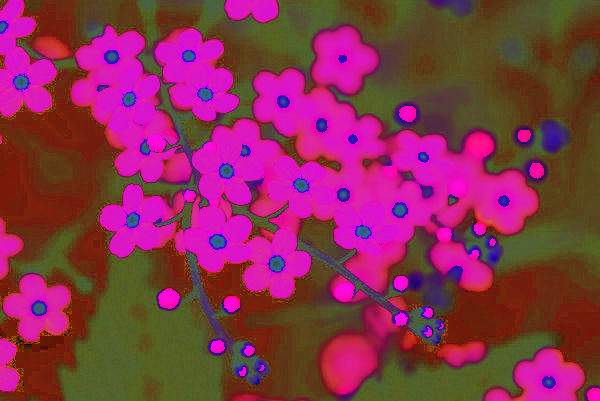

##3. YUV RENK UZAYI

 PAL, NTSC, SECAM kompozit renkli video standartlarında kullanılır.

 Y, **ışıklılık** (luma); U ve V **renklilik** (chrominance) bileşenleridir.
 YUV bileşenleri RGB’den türetilir.

 Y, ortalama parlaklığı veren ve R, G, B bileşenlerinin ağırlıklı ortalaması ile
 elde edilen ışıklılık bileşeni; U, mavi bileşeninden Y’nin; V, kırmızı
 bileşeninden Y nin çıkarılması ile elde edilen fark bileşenleridir.


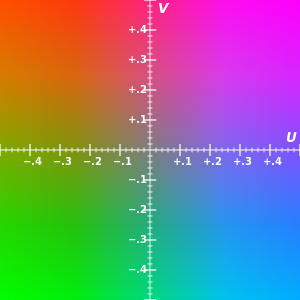

In [ ]:
from IPython.display import Image
Image(filename="/content/05_YUV.png")

Y=0.5 için elde edilen U-V renk düzlemi

   >>>> Şekil 2.1


**RGB → YUV geçiş:**

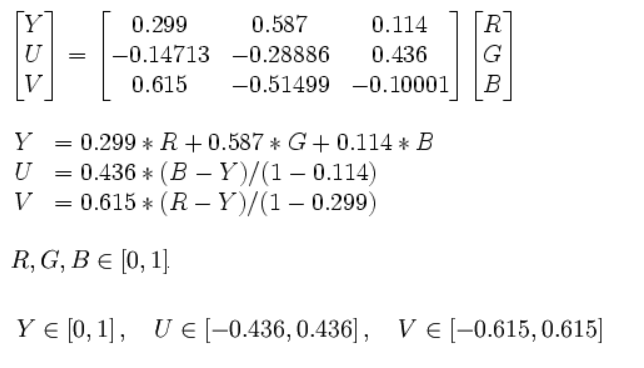

In [ ]:
Image(filename="/content/05_yuvFormul2.png")

##3.1. YUV  Metodu Uygulaması


In [ ]:
from PIL import Image
import math

#PIL modülünden IMAGE kütüphanesi uygulamaya dahil edilir.
def  rgbtoyuv (R, G, B):
  r=R/255
  g=G/255 #Değerler normalize hale getirilir.
  b=B/255

  Y=(0.299*r)+(0.587*g)+(0.114*b)
  U=0.492*(b-Y)
  V=0.877*(r-Y)

  return int(Y*255),int(U*255),int(V*255) # y,u,v değerleri 255 ile çarpılarak resim üzerinde gösterilir.
  #Tür dönüşümü yapılan değerler geri gönderilir.


In [ ]:
resim = Image.open("/content/05_hsi.png").convert('RGB')

resim_pix = resim.load()

#resmi load fonksiyonuyla pix değişkenine yüklüyoruz

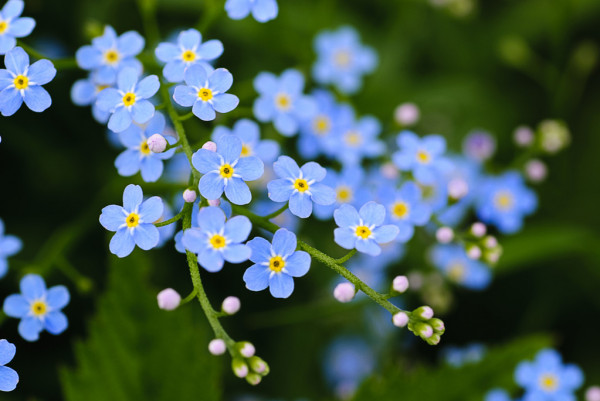

In [ ]:
#@title 05_hsi.png dosyanın orjinal hali
display(resim)

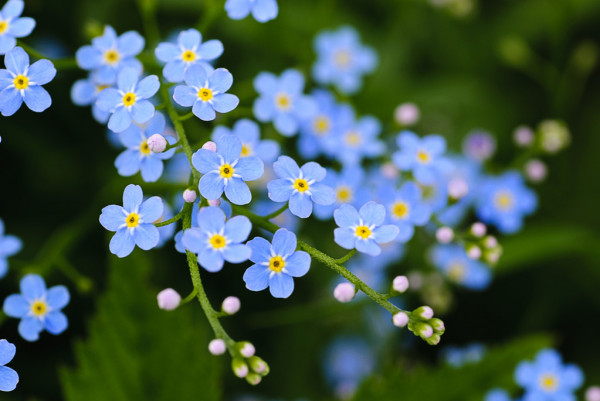

In [ ]:
w=resim.size[0]
#w değişkenine resim dosyasının genişlik boyutunu atılır. Dosyanın genişliği 640 piksel.
hg=resim.size[1]
#hg değişkenine resim dosyasının yükseklik boyutunu atılır. Dosyanın yüksekliği 360 piksel.
for i in range(w):
#Görüntünün tüm piksellerinde bulunan renk kodlarını almak için iç içe döngü oluşturulur.
  for j in range(hg):
      r, g, b = resim.getpixel((i, j))
#Her pikselde birer r(kırmızı),g(yeşil),b(mavi) değeri bulunmaktadır. Bunlar o piksele renk veren kodlardır. Öncelikle 'getpixel' fonksiyonu ile bu değerleri r,g,b değişkenlerine atılır.
      h, s, v = rgbtoyuv(r, g, b)
#Alınan r,g,b değişkenler rgbtoyuv fonksiyonuna gönderilir. Bu fonksiyonun geri dönüşü üç parametre olacaktır. Bunlar da y,u,v değişkenlerinde saklanır.
      resim_pix[i,j] = (h, s, v)
#Fonksiyondan elde edilen  y,u,v değerleri görüntünün uygun piksellerine yeni değer olarak atılır.
resim.save("/content/yuv_new.jpg")
#Oluşan görüntü yeni adıyla belirtilen klasöre kaydedilir.


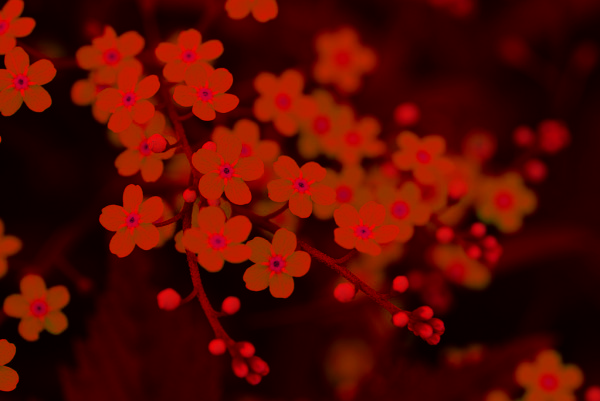

In [ ]:
#@title yuv_new.jpg dosyasının yeni hali
display(resim)

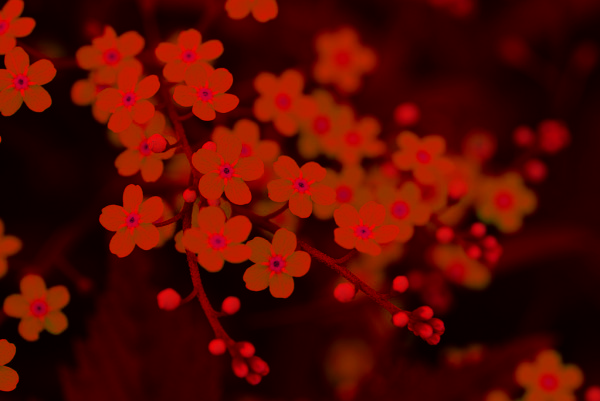